# [9660] Homework 2 - Logistic Regression
Data file: https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/mushrooms_1_30k.csv

## Homework Submission Rules (for all homework assignments)
* Homework is due by 6:30 PM on the due date
  * No late submission will be accepted
* Verify that you are submitting the correct homework file
* Homework file naming convention
  * LastName_FirstName_HwX.ipynb  [Replace X with the homework #]
    * 1 point deducted for submitting homework not complying with naming convention
* Before submission, execute "Kernel -> Restart Kernel and Run All Cells"
  * 1 point deducted for not submitting a cleanly executed notebook

## Homework 2 Requirements
* Load data into dataframe
* Examine data
* Prepare data for model training
  * Use SimpleImputer to replace missing values
  * Perform one-hot (dummy) encoding on categorical variable
  * Perform label encoding on target variable
* Train baseline Logistic Regression model
  * If you get errors, change appropriate hyperparameters to eliminate errors
  * Calculate and display model accuracy
  * Display confusion matrix
* Re-train Logistic Regression model to exceed accuracy of baseline model
  * Change hyperparameters accordingly to achieve this accuracy level
    * If you used hyperparameter random_state in your initial model training, do NOT change this value during model retrainings
    * Do NOT re-split training and test sets during model retrainings
  * Calculate and display accuracy of re-trained model
  * Display confusion matrix of re-trained model

In [ ]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 10/23/24 21:57:19


### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Load data

#### Mushrooms poisonous / edible dataset
Columns
* class  : target variable : string (poisonous, edible)
* cap-diameter : float (cm)
* stem-height : float (cm)
* stem-width : float (cm)
* season : string (spring, summer, autumn, winter)
* cap-shape : binary : one-hot encoded features for cap-shape
  * cap-shape_convex
  * cap-shape_flat
  * cap-shape_sunken
* cap-color : binary : one-hot encoded features for cap-color
  * cap-color_brown
  * cap-color_orange
  * cap-color_red
  * cap-color_white
  * cap-color_yellow
* habitat : binary : one-hot encoded features for habitat
  * habitat_grasses
  * habitat_heaths
  * habitat_leaves
  * habitat_meadows
  * habitat_woods
* mushroom-id : unique identifier : integer

In [ ]:
# Read data from file (mushrooms_1_30k.csv) into dataframe
#  NOTES:
#   Field separator is ';'
#   Use mushroom-id as the index column
df=pd.read_csv('https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/mushrooms_1_30k.csv',sep=';',index_col='mushroom-id')

### Examine data

In [ ]:
# Review dataframe shape
df.shape

(30000, 18)

In [ ]:
# Display first few rows of dataframe
df.head()

,class,cap-diameter,stem-height,stem-width,season,cap-shape_convex,cap-shape_flat,cap-shape_sunken,cap-color_brown,cap-color_orange,cap-color_red,cap-color_white,cap-color_yellow,habitat_grasses,habitat_heaths,habitat_leaves,habitat_meadows,habitat_woods
mushroom-id,,,,,,,,,,,,,,,,,,
6899,poisonous,15.26,16.95,17.09,winter,1,0,0,0,1,0,0,0,0,0,0,0,1
9860,poisonous,16.60,17.99,18.19,summer,1,0,0,0,1,0,0,0,0,0,0,0,1
2436,poisonous,14.07,17.80,17.74,winter,1,0,0,0,1,0,0,0,0,0,0,0,1
9247,poisonous,14.17,15.77,15.98,winter,0,1,0,0,0,1,0,0,0,0,0,0,1
23440,poisonous,14.64,16.53,17.20,NaN,1,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
# Display distribution counts for target variable 'class'
df['class'].value_counts()

,count
class,
poisonous,16404
edible,13596


### Prepare data

#### Check for missing values

In [ ]:
df.isnull().sum()

,0
class,0
cap-diameter,195
stem-height,0
stem-width,0
season,329
cap-shape_convex,0
cap-shape_flat,0
cap-shape_sunken,0
cap-color_brown,0
cap-color_orange,0


#### Use the SimpleImputer to replace missing values

In [ ]:
imp_mean= SimpleImputer(missing_values=np.nan,strategy='mean')

In [ ]:
cols_to_impute_1=['cap-diameter']
df[cols_to_impute_1]=imp_mean.fit_transform(df[cols_to_impute_1])

In [ ]:
imp_most_freq=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
cols_to_impute_2=['season']
df[cols_to_impute_2]=imp_most_freq.fit_transform(df[cols_to_impute_2])

#### Check for missing values again

In [ ]:
df.isnull().sum()

,0
class,0
cap-diameter,0
stem-height,0
stem-width,0
season,0
cap-shape_convex,0
cap-shape_flat,0
cap-shape_sunken,0
cap-color_brown,0
cap-color_orange,0


### Review updated dataframe

In [ ]:
df.sample(10)

,class,cap-diameter,stem-height,stem-width,season,cap-shape_convex,cap-shape_flat,cap-shape_sunken,cap-color_brown,cap-color_orange,cap-color_red,cap-color_white,cap-color_yellow,habitat_grasses,habitat_heaths,habitat_leaves,habitat_meadows,habitat_woods
mushroom-id,,,,,,,,,,,,,,,,,,
13784,edible,9.92,10.26,14.88,summer,1,0,0,1,0,0,0,0,0,0,0,0,1
12856,edible,5.66,5.87,8.51,summer,0,0,1,1,0,0,0,0,0,0,0,0,1
7162,poisonous,13.05,17.87,17.76,autumn,1,0,0,0,1,0,0,0,0,0,0,0,1
23355,edible,14.66,9.93,17.19,autumn,1,0,0,1,0,0,0,0,0,0,0,1,0
23797,poisonous,6.74,8.94,11.12,autumn,1,0,0,0,0,1,0,0,0,0,0,0,1
31054,poisonous,3.09,3.86,6.77,autumn,0,1,0,0,1,0,0,0,0,0,0,0,1
7869,poisonous,15.59,18.76,18.58,winter,1,0,0,0,1,0,0,0,0,0,0,0,1
34812,edible,7.16,5.11,13.37,summer,1,0,0,0,0,0,0,1,0,0,0,0,1
33496,poisonous,8.11,9.30,11.49,autumn,0,1,0,1,0,0,0,0,0,1,0,0,0


#### One-hot (dummy) encode categorical variable 'season'

In [ ]:
one_hot_encode=['season']
df=pd.get_dummies(df,columns=one_hot_encode,dtype=int)
df.head()

,class,cap-diameter,stem-height,stem-width,cap-shape_convex,cap-shape_flat,cap-shape_sunken,cap-color_brown,cap-color_orange,cap-color_red,...,cap-color_yellow,habitat_grasses,habitat_heaths,habitat_leaves,habitat_meadows,habitat_woods,season_autumn,season_spring,season_summer,season_winter
mushroom-id,,,,,,,,,,,,,,,,,,,,,
6899,poisonous,15.26,16.95,17.09,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
9860,poisonous,16.60,17.99,18.19,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2436,poisonous,14.07,17.80,17.74,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
9247,poisonous,14.17,15.77,15.98,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
23440,poisonous,14.64,16.53,17.20,1,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


#### Label encode target variable 'class'

In [ ]:
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])

### Display first few rows of final updated dataframe before model training

In [ ]:
df.head()

,class,cap-diameter,stem-height,stem-width,cap-shape_convex,cap-shape_flat,cap-shape_sunken,cap-color_brown,cap-color_orange,cap-color_red,...,cap-color_yellow,habitat_grasses,habitat_heaths,habitat_leaves,habitat_meadows,habitat_woods,season_autumn,season_spring,season_summer,season_winter
mushroom-id,,,,,,,,,,,,,,,,,,,,,
6899,1,15.26,16.95,17.09,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
9860,1,16.60,17.99,18.19,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2436,1,14.07,17.80,17.74,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
9247,1,14.17,15.77,15.98,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
23440,1,14.64,16.53,17.20,1,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


### Separate independent and dependent variables
* Independent variables: All remaining variables except 'class'
* Dependent variable: 'class'

In [ ]:
df_dependent=df['class']
df_independent=df.drop(['class'],axis=1)

### Split data into training and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_independent, df_dependent, stratify=df_dependent, test_size=0.2, random_state=42)

### Train Logistic Regression model

In [ ]:
model=LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### If the above results in error, review the error message, look up the documentation for LogisticRegression, change the appropriate model hyperparameter and re-train the model
* Repeat until there is no error

In [ ]:
model = LogisticRegression(max_iter = 200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

### Test model

In [ ]:
# Generate predictions against the test set
predictions=model.predict(X_test)

In [ ]:
print(predictions)

[1 1 1 ... 1 1 1]


### Model evaluation

In [ ]:
# Print model accuracy
accuracy = model.score(X_test, y_test)
print("accuracy =", round((accuracy * 100), 2), "%")

accuracy = 66.38 %


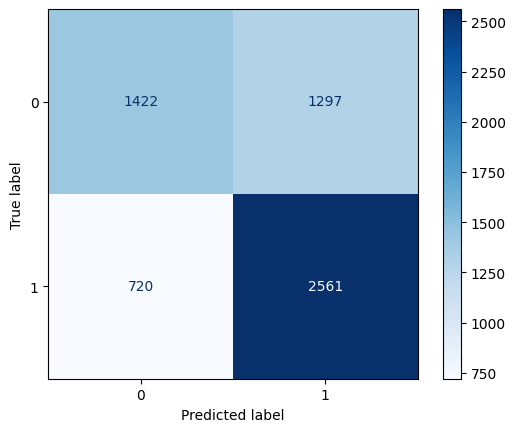

In [ ]:
# Display confusion matrix with class labels
cnf_matrix = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,
                              display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Re-train logistic regression model with different hyperparameters
Goal: Improve model performance accuracy to exceed that of baseline model

In [ ]:
# Re-train model with different hyperparameters
model = LogisticRegression(C=.005,penalty='elasticnet',solver='saga',l1_ratio=.7,max_iter = 1000)
model.fit(X_train, y_train)

LogisticRegression(C=0.005, l1_ratio=0.7, max_iter=1000, penalty='elasticnet',
                   solver='saga')

### Test updated model

In [ ]:
# Generate predictions against the test set
predictions=model.predict(X_test)

In [ ]:
print(predictions)

[1 1 1 ... 1 1 1]


### Evaluate updated model

In [ ]:
# Print updated model accuracy
accuracy = model.score(X_test, y_test)
print("accuracy =", round((accuracy * 100), 2), "%")

accuracy = 67.22 %


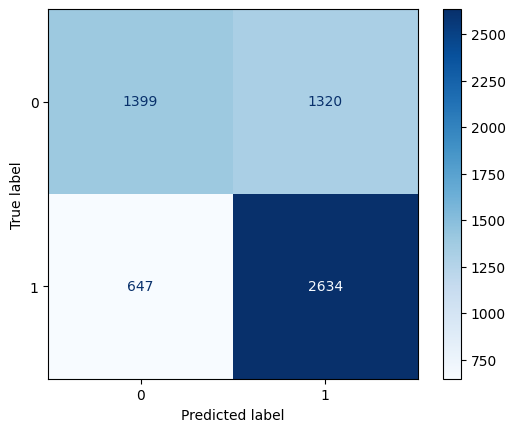

In [ ]:
# Display updated confusion matrix with class labels
cnf_matrix = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,
                              display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()